# <center> Árvores de decisão<center>

Estrutura de uma árvore de decisão

![](tree_nos.jpg)

Exemplo simples:

![](tree_ex.gif)

![](tree_imp.png)

![](tree_gini.jpg)

Critério de Gini

$$ Gini(D) = 1 - \sum(p_i^2) $$

- Impureza antes da divisão: $G(pré-divisão) = 1 - ( (15/30)^2 + (15/30)^2 ) = 0.5 $

- Divisão por sexo:
    - $G(meninas) = 1 - ( (2/10)^2 + (8/10)^2 ) = 0.319 $
    - $G(meninos) = 1 - ( (13/20)^2 + (17/20)^2 ) = 0.454 $


**Implementando com sklearn**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

Dados utilizados

In [2]:
dados = pd.read_csv('bank-full.csv', delimiter=';')

In [3]:
dados.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


#### Análise exploratória

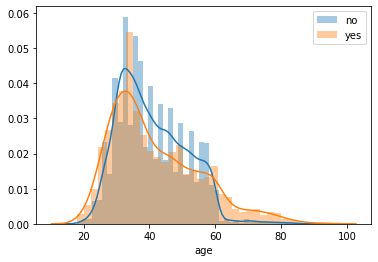

In [5]:
sns.distplot(dados['age'][dados['y']=='no'], label='no')
sns.distplot(dados['age'][dados['y']=='yes'], label='yes')
plt.legend()

In [6]:
from statsmodels.graphics.mosaicplot import mosaic

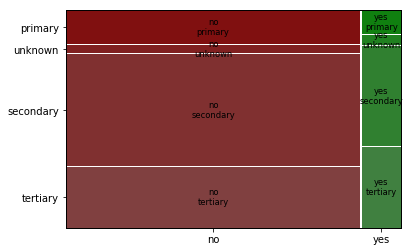

In [7]:
mosaic(dados, ['y', 'education']);

Tratamento dos dados categóricos

In [8]:
education = dados['education']

In [9]:
# Pandas

#convertendo os dados para categórico
educationCvt = education.astype('category')

#pegando os valores de cada categoria
educationCvt = educationCvt.cat.codes
educationCvt

0        2
1        1
2        1
3        3
4        3
5        2
6        2
7        2
8        0
9        1
10       1
11       1
12       1
13       3
14       1
15       0
16       3
17       0
18       0
19       1
20       1
21       2
22       0
23       1
24       0
25       1
26       2
27       1
28       1
29       1
        ..
45181    1
45182    1
45183    0
45184    1
45185    2
45186    3
45187    1
45188    1
45189    1
45190    1
45191    2
45192    2
45193    2
45194    2
45195    1
45196    1
45197    1
45198    2
45199    1
45200    1
45201    2
45202    1
45203    2
45204    1
45205    1
45206    2
45207    0
45208    1
45209    1
45210    1
Length: 45211, dtype: int8

In [10]:
#importando sklearn
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

#transformando
educationCvt2 = label.fit_transform(education)

In [11]:
educationCvt2

array([2, 1, 1, ..., 1, 1, 1])

In [12]:
#aplicando nos outros dados
for coluna in dados:
    if dados[coluna].dtype == object:
        dados[coluna] = dados[coluna].astype('category').cat.codes
        
dados.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


*Separando os dados*

In [13]:
y = dados['y']
x = dados.drop('y', axis=1)

In [14]:
from sklearn.model_selection import train_test_split
xTreino, xTeste, yTreino, yTeste = train_test_split(x,y)

*Criando o modelo*

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
modelo = DecisionTreeClassifier()

In [17]:
modelo.fit(xTreino, yTreino)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [18]:
preditos = modelo.predict(xTeste)

In [19]:
#checando a acuracia
from sklearn.metrics import accuracy_score

accuracy_score(yTeste, preditos)

0.866053260196408

**Visualizando a árvore de decisão**

In [32]:
modelo = DecisionTreeClassifier(max_depth=5)

In [33]:
modelo.fit(xTreino, yTreino)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [34]:
!pip install graphviz

In [35]:
from IPython.display import SVG
from graphviz import Source
from sklearn.tree import export_graphviz

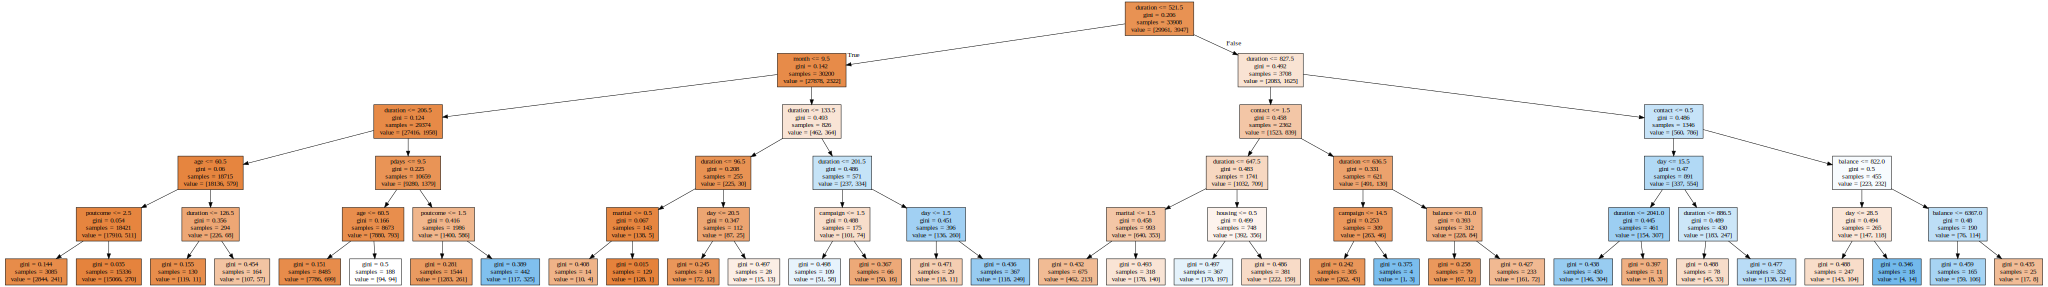

In [43]:
graph = Source(export_graphviz(decision_tree=modelo,
                              out_file=None,
                              feature_names=x.columns,
                              filled=True))

display(SVG(graph.pipe(format='svg')))

**Regressão com árvores de decisão**

Implementando com o sklearn

In [44]:
dados = pd.read_csv('HousePrice.csv')

In [45]:
dados.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [56]:
dados = dados.fillna(-1)

In [57]:
for coluna in dados:
    if dados[coluna].dtype == object:
        dados[coluna] = dados[coluna].astype('category').cat.codes

In [58]:
y = dados['SalePrice']
x = dados.drop(['SalePrice', 'Id'], axis=1)

Modelo

In [59]:
from sklearn.tree import DecisionTreeRegressor

In [60]:
xTreino, xTeste, yTreino, yTeste = train_test_split(x,y)

modelo = DecisionTreeRegressor()

In [61]:
modelo.fit(xTreino, yTreino)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [63]:
preditos = modelo.predict(xTeste)

Avaliando a qualidade do modelo

In [66]:
from sklearn.metrics import r2_score

r2_score(yTeste, preditos)

0.6284817521735848

In [67]:
modelo.score(xTreino, yTreino)

1.0

In [68]:
modelo.score(xTeste, yTeste)

0.6284817521735848